In [1]:
#!pip install scikit-learn
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [2]:
import csv
!pip install scikit-learn
!pip install pandas
!pip install seaborn
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [4]:
NUM_CLASSES = 14

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 13)                143       
                                                                 
Total params: 1213 (4.74 KB)
Trainable params: 1213 (4.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


2024-04-06 13:01:47.734710: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 13 which is outside the valid range of [0, 13).  Label values: 5 9 12 13 13 1 6 10 7 3 1 7 5 3 2 12 9 3 5 3 3 11 11 4 6 8 4 10 13 5 5 11 4 2 5 3 4 9 2 1 7 3 9 4 1 2 1 4 1 6 12 8 2 1 1 2 11 3 4 7 11 3 7 1 11 1 4 1 4 2 11 12 7 7 13 2 11 4 6 5 8 1 0 2 5 2 4 9 10 1 12 3 11 1 12 13 2 13 3 6 1 1 2 8 1 1 1 10 12 0 13 8 5 3 10 13 12 4 0 2 1 6 5 4 2 12 13 3


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 604, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1909, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/Users/vaibhavgogia/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/ipykernel_1128/2889966517.py", line 1, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 13 which is outside the valid range of [0, 13).  Label values: 5 9 12 13 13 1 6 10 7 3 1 7 5 3 2 12 9 3 5 3 3 11 11 4 6 8 4 10 13 5 5 11 4 2 5 3 4 9 2 1 7 3 9 4 1 2 1 4 1 6 12 8 2 1 1 2 11 3 4 7 11 3 7 1 11 1 4 1 4 2 11 12 7 7 13 2 11 4 6 5 8 1 0 2 5 2 4 9 10 1 12 3 11 1 12 13 2 13 3 6 1 1 2 8 1 1 1 10 12 0 13 8 5 3 10 13 12 4 0 2 1 6 5 4 2 12 13 3
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_734]

In [ ]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

19/19 [==============================] - 0s 339us/step - loss: 0.1790 - accuracy: 0.9631


In [ ]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 21ms/step
[1.0843129e-03 8.5005933e-01 6.3302331e-02 4.2092387e-02 1.1182517e-02
 4.0582902e-04 7.9964241e-03 1.8033147e-02 3.5089836e-03 2.2696941e-03
 3.0430980e-05 3.4632372e-05]
1


# 混同行列


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
75/75 [==============================] - 0s 259us/step


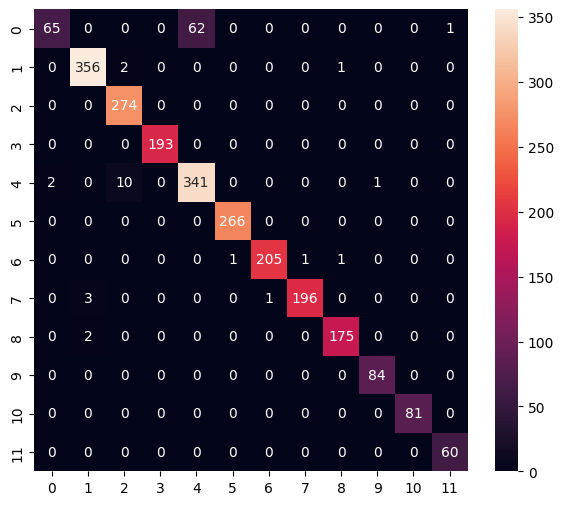

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.51      0.67       128
           1       0.99      0.99      0.99       359
           2       0.96      1.00      0.98       274
           3       1.00      1.00      1.00       193
           4       0.85      0.96      0.90       354
           5       1.00      1.00      1.00       266
           6       1.00      0.99      0.99       208
           7       0.99      0.98      0.99       200
           8       0.99      0.99      0.99       177
           9       0.99      1.00      0.99        84
          10       1.00      1.00      1.00        81
          11       0.98      1.00      0.99        60

    accuracy                           0.96      2384
   macro avg       0.98      0.95      0.96      2384
weighted avg       0.97      0.96      0.96      2384



In [ ]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [ ]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmp06ftdc_9/assets


INFO:tensorflow:Assets written to: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmp06ftdc_9/assets
2024-03-10 22:31:35.007932: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-10 22:31:35.007943: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 6, Total Ops 13, % non-converted = 46.15 %
 * 6 ARITH ops

- arith.constant:    6 occurrences  (f32: 6)



  (f32: 3)
  (f32: 1)


6960

# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 84 µs, sys: 20 µs, total: 104 µs
Wall time: 109 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0843130e-03 8.5005933e-01 6.3302316e-02 4.2092409e-02 1.1182517e-02
 4.0582882e-04 7.9964204e-03 1.8033130e-02 3.5089853e-03 2.2696941e-03
 3.0430980e-05 3.4632343e-05]
1
